# Implementing Linear Regression from Scratch and Using Scikit-Learn
This notebook covers **two approaches** to implementing Linear Regression:
1. **From Scratch** (Using Gradient Descent)
2. **Using Scikit-Learn** (Prebuilt Model)

## About the Author
This notebook was created by **Aimal Khan**.

### Step 1: Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Step 2: Generate Sample Data
We will create a small dataset where **X represents study hours** and **Y represents exam scores**.

In [10]:
# Sample dataset (Hours Studied vs Exam Score)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([2, 2.8, 3.6, 4.5, 5.1, 6.0, 6.8, 7.5, 8.3, 9.0])

# Convert to 2D array for easier calculations
X = X.reshape(-1, 1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

### Step 3: Implement Gradient Descent Function
This function will optimize the slope (**b1**) and intercept (**b0**) to minimize errors.

In [23]:
def gradient_descent(X, Y, alpha=0.001, epochs=1000):
    """ Perform Gradient Descent for Linear Regression """
    b0 = 0  # Initialize intercept
    b1 = 0  # Initialize slope
    n = len(X)  # Number of training examples
    
    # Convert to numpy array for calculations
    X = np.array(X)
    Y = np.array(Y)
    
    for i in range(epochs):
        # Compute predictions
        Y_pred = b0 + b1 * X  # Predicted values
        error = Y - Y_pred  # Residuals

        # Compute gradients
        db0 = (-2/n) * np.sum(error)
        db1 = (-2/n) * np.sum(X * error)

        # Check for NaN divergence
        if np.isnan(db0) or np.isnan(db1):
            print(f"Gradient exploded at iteration {i}")
            break

        # Update parameters with smaller learning rate
        b0 -= alpha * db0
        b1 -= alpha * db1
        
        # Optional: Print debugging info every 100 epochs
        if i % 100 == 0:
            print(f"Iteration {i}: b0={b0:.4f}, b1={b1:.4f}")

    return b0, b1

### Step 4: Train the Model Using Gradient Descent

In [28]:
# Train model using gradient descent
b0, b1 = gradient_descent(X, Y, alpha=0.001, epochs=1000)

print(f"Optimized Intercept (b0): {b0:.4f}")
print(f"Optimized Slope (b1): {b1:.4f}")

Iteration 0: b0=0.1112, b1=0.6116
Iteration 100: b0=1.9987, b1=0.5115
Iteration 200: b0=3.2220, b1=0.3358
Iteration 300: b0=4.0251, b1=0.2205
Iteration 400: b0=4.5524, b1=0.1447
Iteration 500: b0=4.8985, b1=0.0950
Iteration 600: b0=5.1257, b1=0.0624
Iteration 700: b0=5.2749, b1=0.0410
Iteration 800: b0=5.3728, b1=0.0269
Iteration 900: b0=5.4371, b1=0.0177
Iteration 1000: b0=5.4793, b1=0.0116
Iteration 1100: b0=5.5070, b1=0.0076
Iteration 1200: b0=5.5252, b1=0.0050
Iteration 1300: b0=5.5372, b1=0.0033
Iteration 1400: b0=5.5450, b1=0.0022
Iteration 1500: b0=5.5502, b1=0.0014
Iteration 1600: b0=5.5535, b1=0.0009
Iteration 1700: b0=5.5558, b1=0.0006
Iteration 1800: b0=5.5572, b1=0.0004
Iteration 1900: b0=5.5582, b1=0.0003
Iteration 2000: b0=5.5588, b1=0.0002
Iteration 2100: b0=5.5592, b1=0.0001
Iteration 2200: b0=5.5595, b1=0.0001
Iteration 2300: b0=5.5597, b1=0.0000
Iteration 2400: b0=5.5598, b1=0.0000
Iteration 2500: b0=5.5599, b1=0.0000
Iteration 2600: b0=5.5599, b1=0.0000
Iteration 270

### Step 5: Make Predictions with the Gradient Descent Model

In [29]:
# Predict new values
X_test = np.array([11, 12, 13]).reshape(-1, 1)
Y_pred = b0 + b1 * X_test

print("Predicted values:", Y_pred)

Predicted values: [[5.56]
 [5.56]
 [5.56]]


### Step 6: Visualize the Regression Line

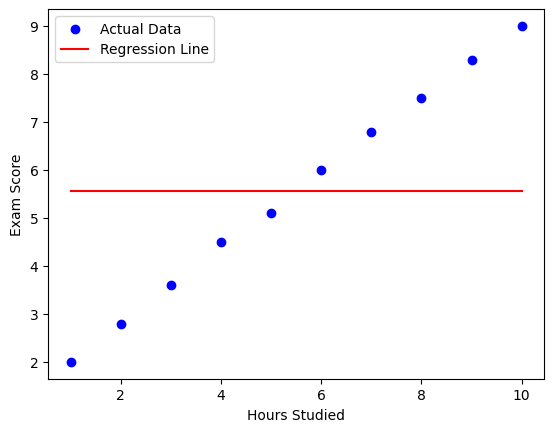

In [30]:
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X, b0 + b1 * X, color='red', label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()

# Implementing Linear Regression Using Scikit-Learn

### Step 1: Train Model Using Scikit-Learn

In [31]:
model = LinearRegression()
model.fit(X, Y)

print(f"Intercept (b0): {model.intercept_:.4f}")
print(f"Slope (b1): {model.coef_[0]:.4f}")

Intercept (b0): 1.2667
Slope (b1): 0.7806


### Step 2: Make Predictions Using Scikit-Learn Model

In [32]:
X_test = np.array([[11], [12], [13]])
Y_pred_sklearn = model.predict(X_test)

print("Predicted values:", Y_pred_sklearn)

Predicted values: [ 9.85333333 10.63393939 11.41454545]


### Step 3: Visualize Regression Line (Scikit-Learn)

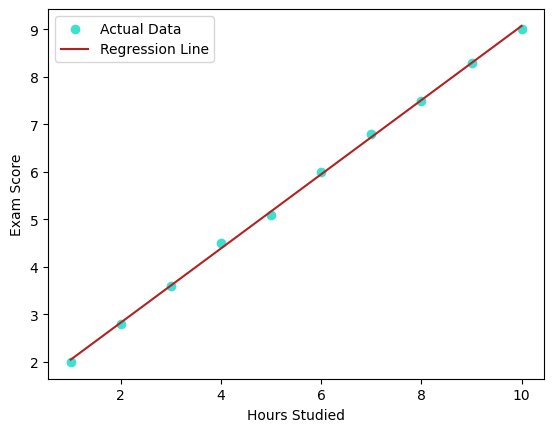

In [34]:
plt.scatter(X, Y, color='turquoise', label="Actual Data")
plt.plot(X, model.predict(X), color='firebrick', label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.show()